In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [342]:
df=pd.read_csv('https://raw.githubusercontent.com/kedeisha1/Challenges/main/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Is there any missing data? Deal with them accordingly.**

In [281]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [343]:
df['director'].fillna('No Director',inplace=True)
df['cast'].fillna('No Cast',inplace=True)
df['country'].fillna('Country Unavailable',inplace=True)
df['date_added'].fillna('January 1, 1970',inplace=True)
df['rating'].fillna('N/A',inplace=True)
df['duration'].fillna('N/A',inplace=True)

**Using the ‘date_added’ column a new column called ‘year_added’ that only has the year the title was added.**

In [284]:
df['year_added']=pd.to_datetime(df["date_added"].str.strip()).dt.year
df['year_added']

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2019
8803    2019
8804    2019
8805    2020
8806    2019
Name: year_added, Length: 8807, dtype: int32

**Using the ‘date_added’ column a new column called ‘month_added’ that only has the month the title was added.**

In [285]:
df['month_added']=pd.to_datetime(df["date_added"].str.strip()).dt.month_name()
df['month_added']

0       September
1       September
2       September
3       September
4       September
          ...    
8802     November
8803         July
8804     November
8805      January
8806        March
Name: month_added, Length: 8807, dtype: object

**Check the data types. Anything look odd? Adjust accordingly.**

In [286]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
year_added       int32
month_added     object
dtype: object

In [287]:
df['date_added']=pd.to_datetime(df["date_added"].str.strip())

In [288]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added             object
dtype: object

In [289]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,N/A,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September
1,s2,TV Show,Blood & Water,N/A,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",N/A,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September
3,s4,TV Show,Jailbirds New Orleans,N/A,N/A,N/A,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September
4,s5,TV Show,Kota Factory,N/A,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September


**What is the most popular release year for movies on Netflix?**

In [290]:
popular_year=df.loc[df.type=='Movie'].release_year.value_counts().head()

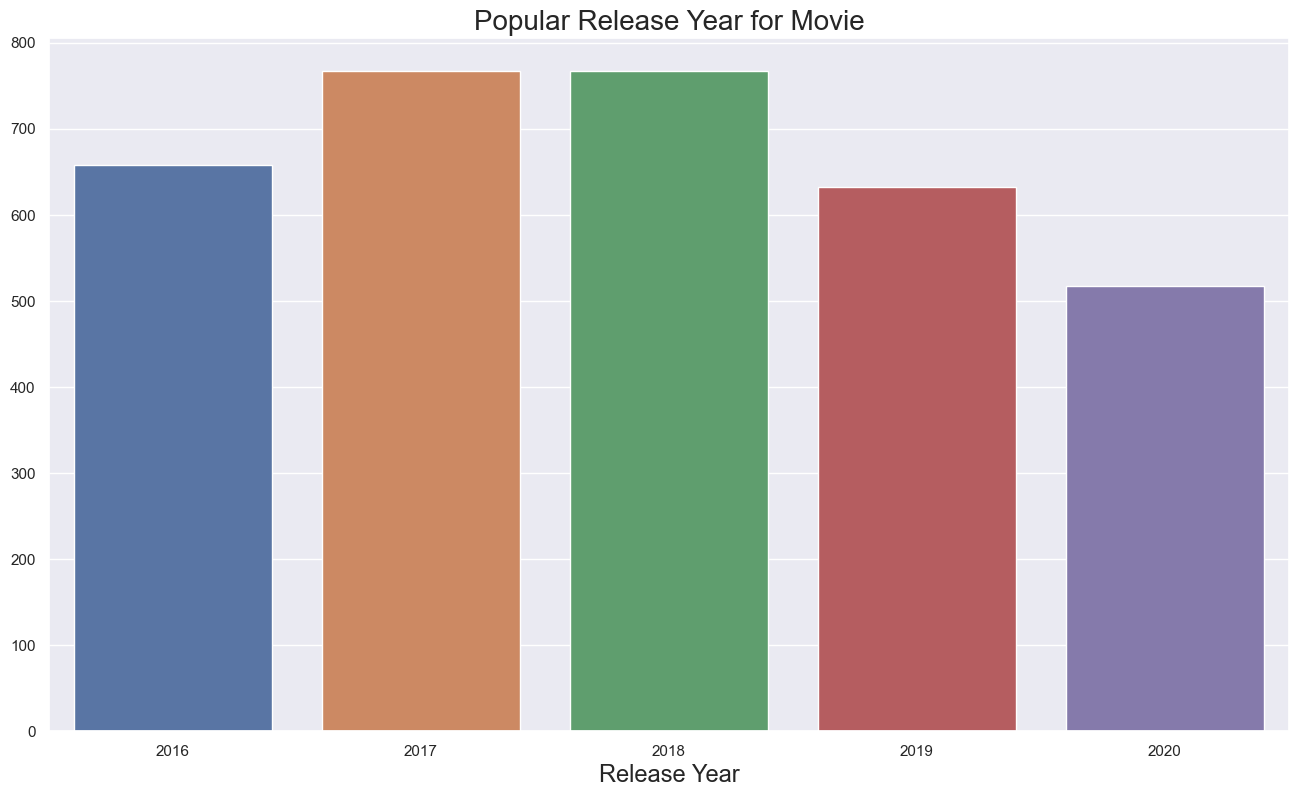

In [308]:
sns.set(style='darkgrid')
plt.figure(figsize=(16,9))
sns.barplot(x=popular_year.index,y=popular_year.values)
plt.title('Popular Release Year for Movie',fontsize=20)
plt.xlabel('No. of Movies released',fontsize=17)
plt.xlabel('Release Year',fontsize=17)
plt.show()

**What year did Netflix add the most content to its platform?**

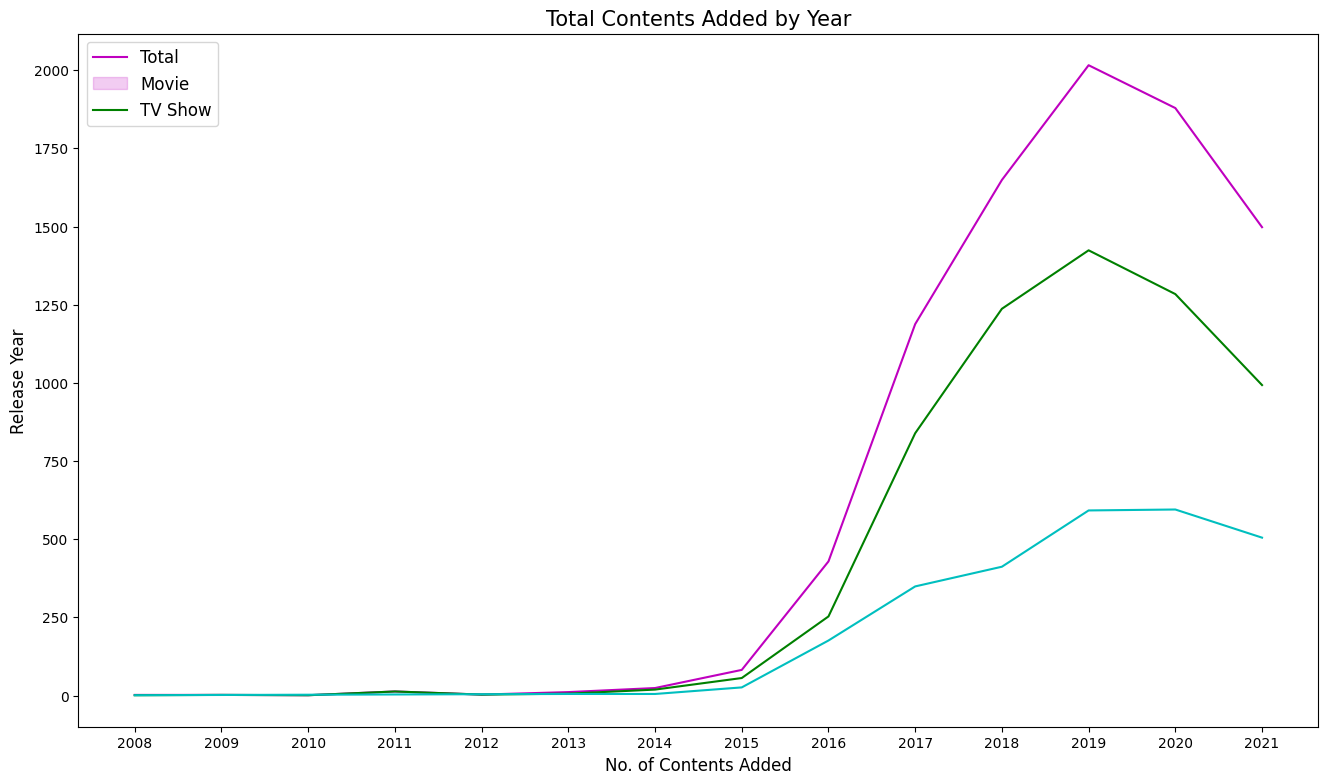

In [292]:
import numpy as np
plt.figure(figsize=(16, 9))
total_shows=df[df.year_added!=1970].groupby(df.year_added)['show_id'].count().sort_values(ascending=False)
movie_shows=df[(df.year_added!=1970) & (df.type=='Movie')].groupby(df.year_added)['show_id'].count().sort_values(ascending=False)
tvshow_shows=df[(df.year_added!=1970) & (df.type=='TV Show')].groupby(df.year_added)['show_id'].count().sort_values(ascending=False)

sns.lineplot(x=total_shows.index,y=total_shows.values,color='m')
sns.lineplot(x=movie_shows.index,y=movie_shows.values,color='g')
sns.lineplot(x=tvshow_shows.index,y=tvshow_shows.values,color='c')

plt.xticks(np.arange(2008,2022,1))
plt.title('Total Contents Added by Year',fontsize=15)
plt.xlabel('No. of Contents Added',fontsize=12)
plt.ylabel('Release Year',fontsize=12)
plt.legend(['Total','Movie','TV Show'],fontsize=12)
plt.show()

**What is the movie with the longest title in the dataset?**

In [293]:
def longest_title_movie(title):
    n,movie=-1,''
    for i in title:
        if len(i)>n:
            n=len(i)
            movie=i
    return movie
    
longest_title_movie(df[df.type=='Movie']['title'])

'Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton'

**What are the top 5 most popular movie genres?**

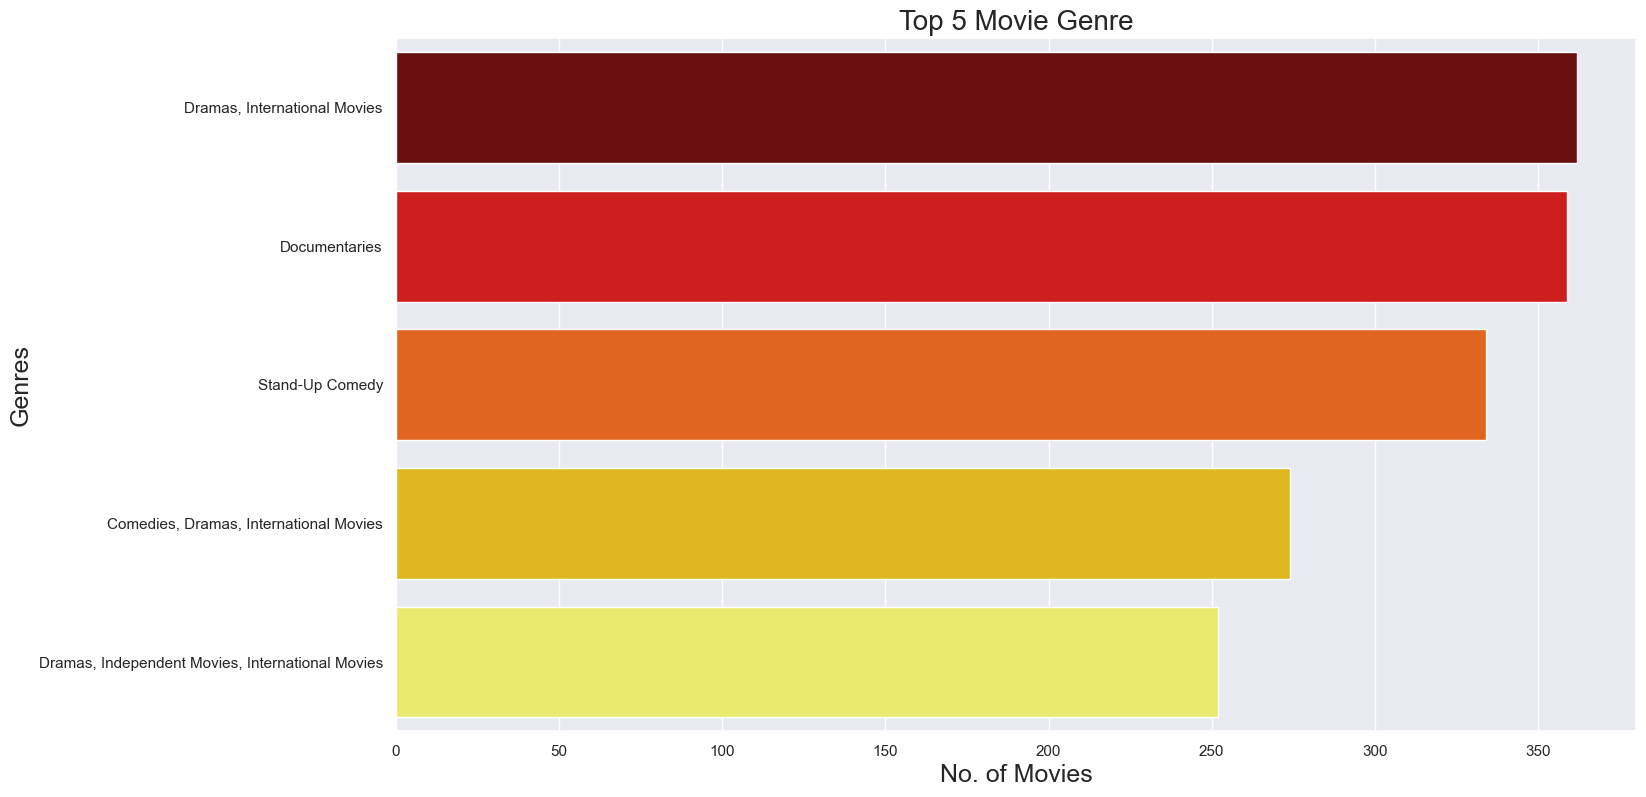

In [309]:
plt.figure(figsize=(16,9))
top5_movie_genre=df[df.type=='Movie'].listed_in.value_counts().head()
sns.barplot(y=top5_movie_genre.index,x=top5_movie_genre.values,palette='hot')
plt.title('Top 5 Movie Genre',fontsize=20)
plt.xlabel('No. of Movies',fontsize=18)
plt.ylabel('Genres',fontsize=18)
plt.show()

**Create a pie chart visualizing the proportion of movies vs TV shows. Label each section with the percentage.**

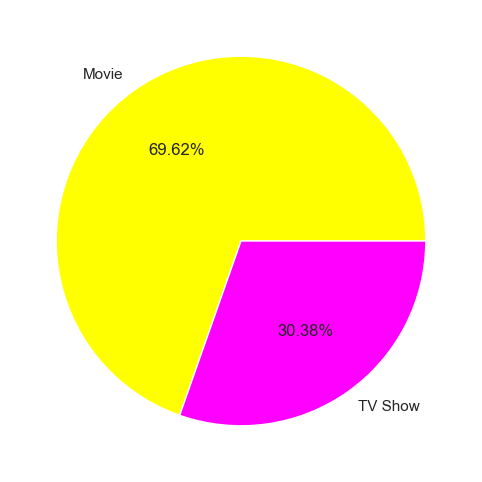

In [304]:
plt.figure(figsize=(8, 6))
show_type=df.type.value_counts()
show_type
plt.pie(show_type.values, labels=show_type.index, autopct="%.2f%%",colors=['#ffff00','#ff00ff'])
plt.show()

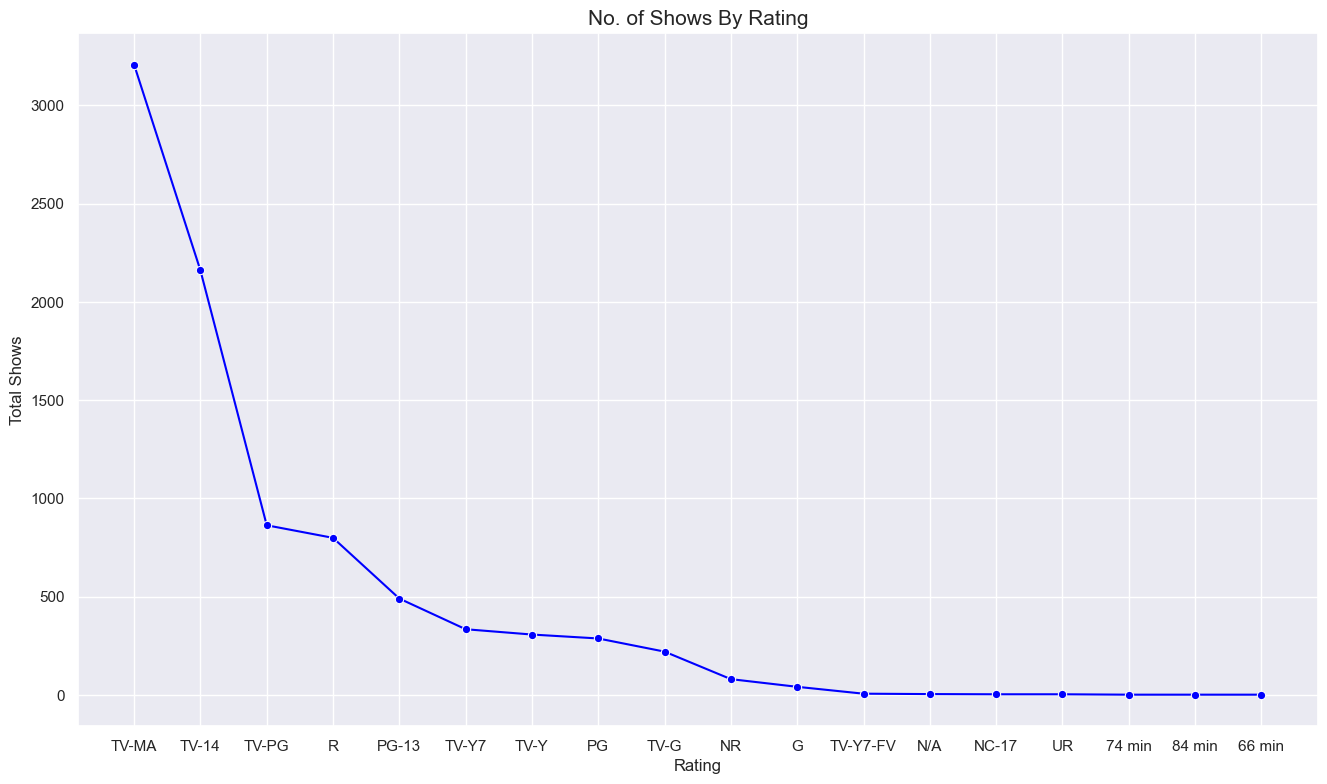

In [317]:
plt.figure(figsize=(16,9))
rating_df=df.rating.value_counts()
sns.lineplot(x=rating_df.index,y=rating_df.values,color='#0000ff',marker='o')
plt.title('No. of Shows By Rating',fontsize=15)
plt.xlabel('Rating',fontsize=12)
plt.ylabel('Total Shows',fontsize=12)
plt.show()

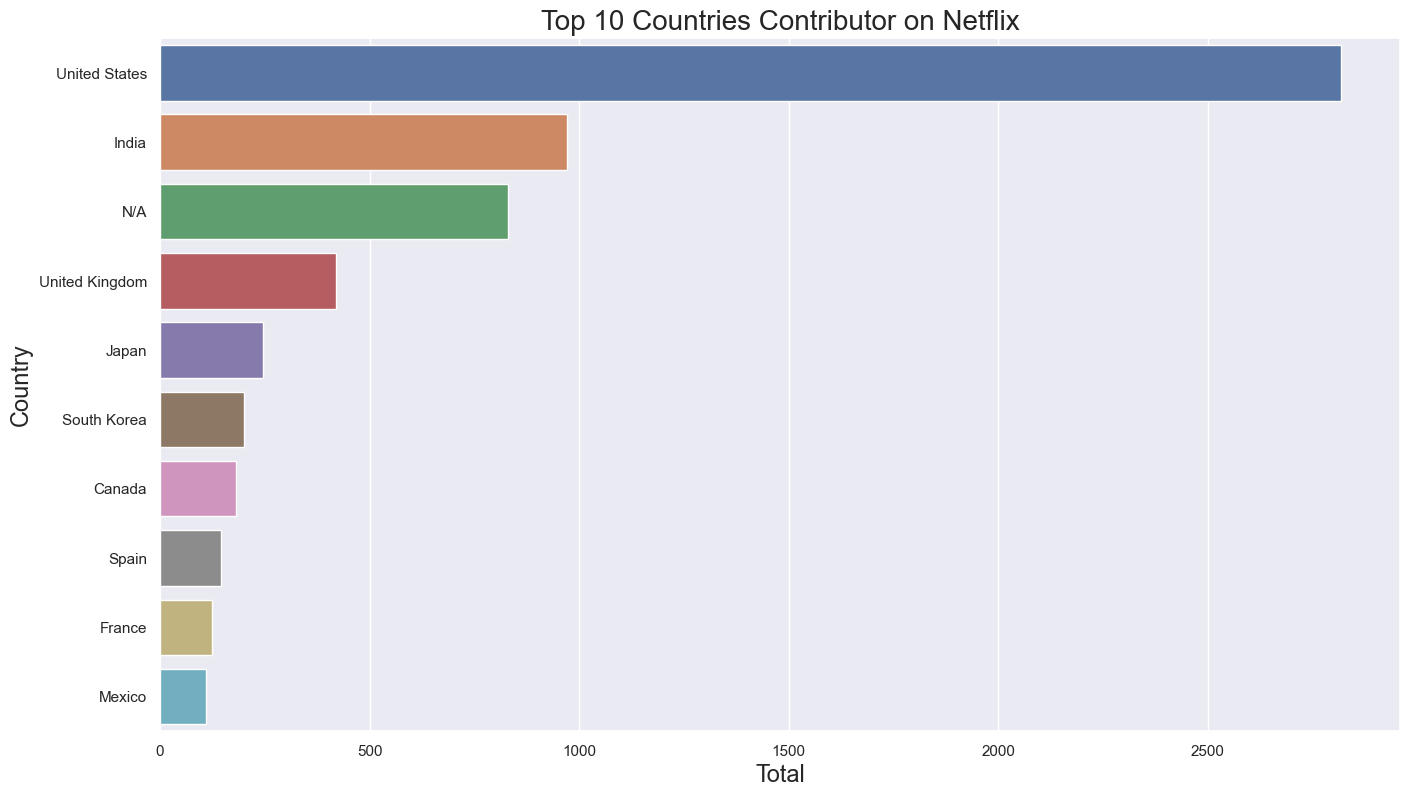

In [335]:
plt.figure(figsize=(16,9))
sns.countplot(y=df.country,order=df.country.value_counts().index[:10])
plt.title('Top 10 Countries Contributor on Netflix',fontsize=20)
plt.xlabel('Total',fontsize=17)
plt.ylabel('Country',fontsize=17)
plt.show()

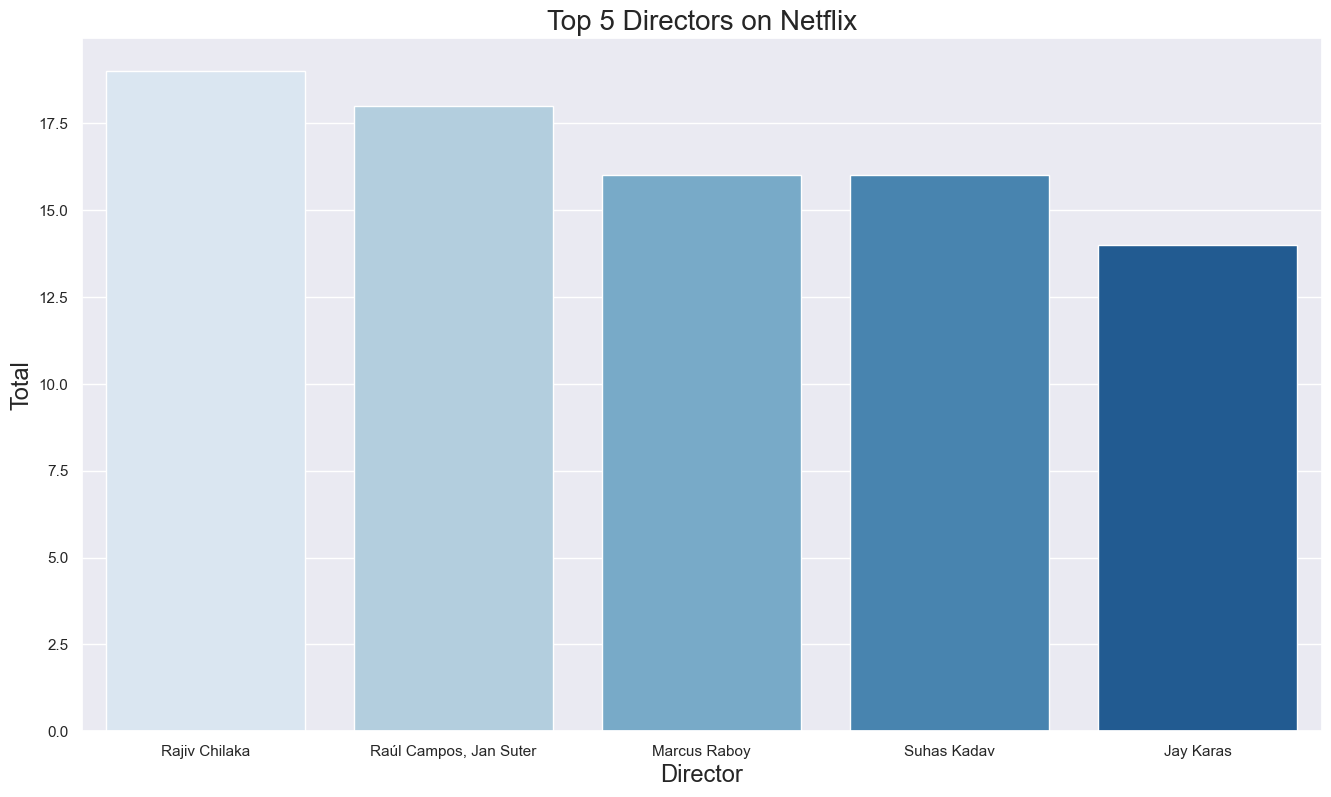

In [357]:
plt.figure(figsize=(16,9))
director_df=df[df.director!='No Director'].director.value_counts().head()
sns.barplot(x=director_df.index,y=director_df.values,palette='Blues')
plt.title('Top 5 Directors on Netflix',fontsize=20)
plt.xlabel('Director',fontsize=17)
plt.ylabel('Total',fontsize=17)
plt.show()

0       False
1        True
2       False
3        True
4        True
        ...  
8802    False
8803     True
8804    False
8805    False
8806    False
Name: director, Length: 8807, dtype: bool

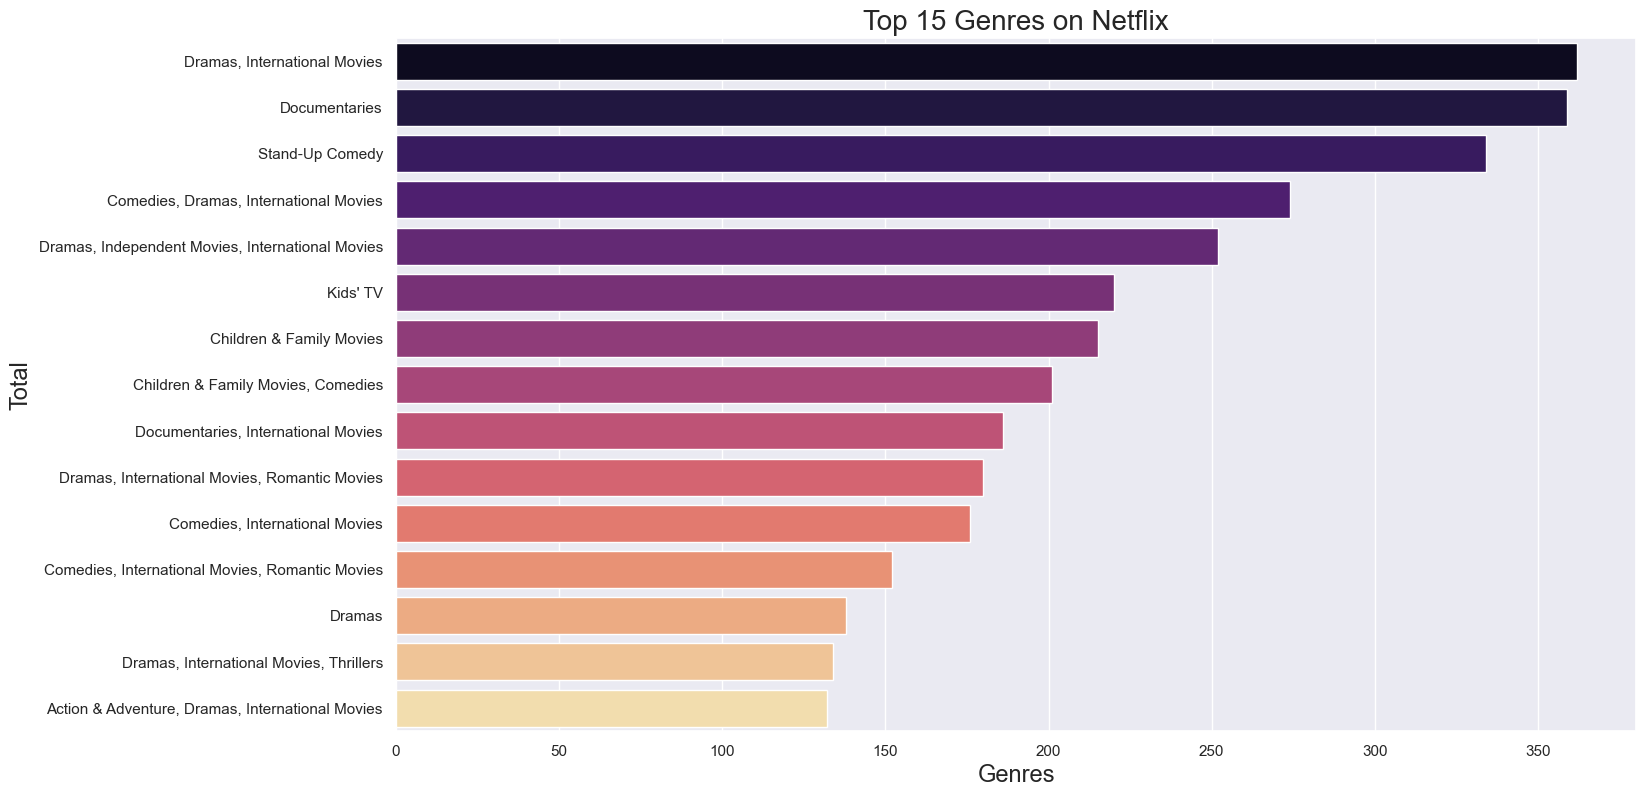

In [364]:
plt.figure(figsize=(16,9))
sns.countplot(y=df.listed_in,order=df.listed_in.value_counts().index[:15],palette='magma')
plt.title('Top 15 Genres on Netflix',fontsize=20)
plt.xlabel('Genres',fontsize=17)
plt.ylabel('Total',fontsize=17)
plt.show()